<a href="https://colab.research.google.com/github/Aashrut/Machine-Learning/blob/master/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

In [45]:
import pandas as pd
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv('Social_Network_Ads.csv')

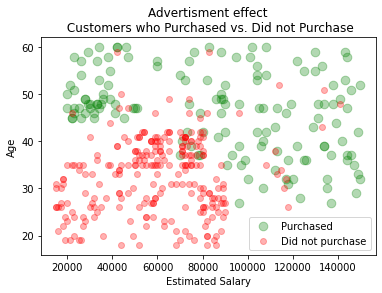

In [46]:
#Data Visualisation
notBuying = df[df.Purchased == 0]
Buying =df[df.Purchased == 1]

plt.title("Advertisment effect\n Customers who Purchased vs. Did not Purchase")
plt.xlabel("Estimated Salary")
plt.ylabel("Age")

plt.scatter(Buying.EstimatedSalary, Buying.Age, color = "green", label = "Purchased", alpha = 0.3, s=75)
plt.scatter(notBuying.EstimatedSalary, notBuying.Age, color = "red", label = "Did not purchase", alpha = 0.3)

plt.legend()
plt.show()

In [48]:
# prepate the feature vector x and the class vector y
x = df.drop(["Purchased"], axis = 1)
y = df.Purchased.values

# Normalization:
scaler =MinMaxScaler()
scaler.fit(x)
x=scaler.transform(x)

#manual normalization
#x = (x - x.min()) / (x.max() - x.min())

#split the data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Optimal AUC: 90.8044 %


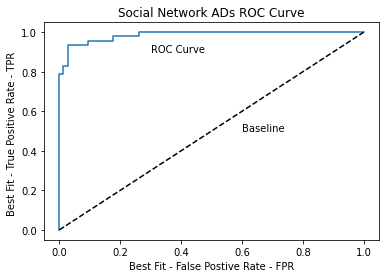

In [50]:
#Optimise the Model using GridSearch
params = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

#create the Naive Bayes Model
nb = GaussianNB()

clf = GridSearchCV(nb, param_grid=params, cv=5, verbose=True, n_jobs=-1)
Optimalmodel = clf.fit(x_train, y_train)

#Make predictions with the optimized model
bestfit_prob = Optimalmodel.predict_proba(x_test)[:,1]
bestfit_pred = Optimalmodel.predict(x_test)

#Measure Model's performance (ROC, AUC) on the Testing Dataset and plot the AUC
fRate, tRate, thresh = roc_curve(y_test, bestfit_prob)
plt.plot(fRate,tRate)
plt.plot([0,1],[0,1],color="black",linestyle="--")

plt.xlabel("Best Fit - False Postive Rate - FPR")
plt.ylabel("Best Fit - True Positive Rate - TPR ")
plt.title("Social Network ADs ROC Curve")
plt.text(0.6,0.5,"Baseline")
plt.text(0.3,0.9,"ROC Curve")


bestfit_auc_roc = roc_auc_score(y_test, bestfit_pred)*100
print('Optimal AUC: %.4f %%' % bestfit_auc_roc)

